# 비정상 절차서 23-01 : <font color=blue>1차기기 냉각수(CCW)계통으로 누설 시 [RCS에서]	

1. 경보 및 증상
2. 자동 동작사항
3. 긴급 조치사항
4. 후속 조치사항

## 1.0  <font color=blue> 데이터 처리

In [1]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
# with open('D:/CRONI_New_Interface/new_db_30mal/ab23_06_30004_(175).pkl', 'rb') as f:
with open('D:/이상현/9._.CNS_Platform(멀티 CNS 실행)/상현CNN/Data_pkl/ab23_01_10004_(266).pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5), 'CPPRZL':deque(maxlen=5), 'PPRZ':deque(maxlen=5)}

## 2.0  <font color=blue> 경보 및 증상 

### 2.1  <font color=blue>모든 원자로냉각재계통 누설 시 공통적 증상  - <font color=green>만족

#### 2.1.1 <font color=blue>PZR 수위 또는 압력 감소  - <font color=green>만족

#### 주의사항

PZR 증기영역 및 계기 접속부에서의 누설 시에는 수위 감소현상은 발생하지 않을 수도 있다. 

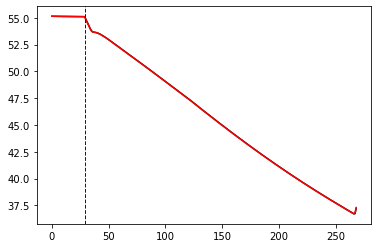

In [4]:
# ZINST63 : 가압기 수위
plt.plot(db['ZINST63'], color='k') # -> 수위 감소 확인
plt.plot(db['ZPRZ']*10, color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

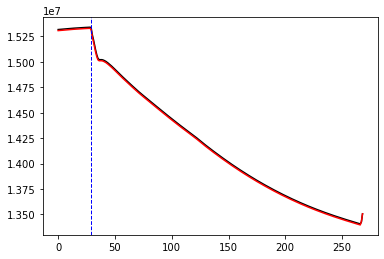

In [5]:
# ZINST58 : 가압기 압력
plt.plot(db['ZINST58']*98067, color='k') # -> 압력 감소 확인
plt.plot(db['PPRZ'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [6]:
pzr_level, pzr_pres = [], []
for i in range(len(db)):
    if i > 29:
        sym_ch[0].append(db['ZINST63'][i])
        sym_ch[1].append(db['ZINST58'][i])
    if len(sym_ch[0]) == 5:
        if sym_ch[0][0] > sym_ch[0][1] > sym_ch[0][2] > sym_ch[0][3] > sym_ch[0][4]:
            pzr_level.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
    if len(sym_ch[1]) == 5:
        if sym_ch[1][0] > sym_ch[1][1] > sym_ch[1][2] > sym_ch[1][3] > sym_ch[1][4]:
            pzr_pres.append(i+1)
#             print(f'압력 감소 증상 만족 시간 : {i+1}초')
print(f'최초 수위 감소 증상 만족 시간 : {pzr_level[0]}초')
print(f'최초 압력 감소 증상 만족 시간 : {pzr_pres[0]}초')

최초 수위 감소 증상 만족 시간 : 35초
최초 압력 감소 증상 만족 시간 : 35초


#### 2.1.2 <font color=blue> VCT 수위 감소 또는 보충횟수 증가  - <font color=green>만족

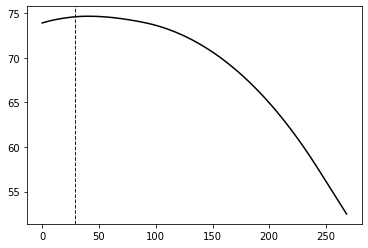

In [7]:
# ZVCT : VCT 수위
plt.plot(db['ZVCT'], color='k') # -> 수위 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [8]:
vct_level = []
for i in range(len(db)):
    if i > 29:
        sym_ch[2].append(db['ZVCT'][i])
    if len(sym_ch[2]) == 5:
        if sym_ch[2][0] > sym_ch[2][1] > sym_ch[2][2] > sym_ch[2][3] > sym_ch[2][4]:
            vct_level.append(i+1)
print(f'최초 VCT 수위 감소 증상 만족 시간 : {vct_level[0]}초')

최초 VCT 수위 감소 증상 만족 시간 : 46초


#### 2.1.3  <font color=blue>발전소 제반요소의 변동이 없는 상태에서 충전유량의 증가 - <font color=green>만족


#### 참고사항


 위 사항은 모든 원자로냉각재계통 누설 시의 증상에 공통적으로 적용된다.

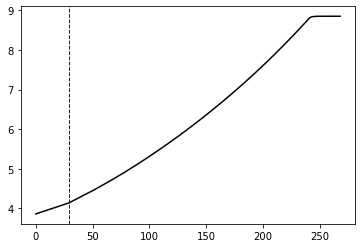

In [9]:
# WCHGNO : 충전유량
plt.plot(db['WCHGNO'], color='k') # -> 충전유량 증가 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [10]:
ch_flow = []
num = 3 # 증감을 판단하는 부분이 아니라면 필요없는 부분임.
for i in range(len(db)):
    if i > 29:
        sym_ch[num].append(db['WCHGNO'][i])
        if len(sym_ch[num]) == 5:
            if sym_ch[num][0] < sym_ch[num][1] < sym_ch[num][2] < sym_ch[num][3] < sym_ch[num][4]:
                ch_flow.append(i+1)
print(f'최초 충전유량 증가 증상 만족 시간 : {ch_flow[0]}초')

최초 충전유량 증가 증상 만족 시간 : 35초


### 2.2  <font color=blue>CV 대기 방사선감시기(GT-RE211) 또는 격납용기 배기계통 방사선감시기(GT-RE119)의 지시치 증가 및 경보  - <font color=green>만족

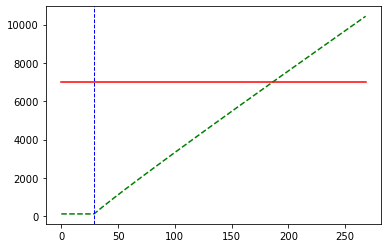

In [50]:
# DSECON : 2차측 방사선, 3.9E-3 : 2차측 방사선 경보 설정치
#plt.plot(db['ZINST22'], color='k') # -> 2차측 방사선 증가 확인
plt.plot(db['DCTMT'], color='g', linestyle='--') # -> 2차측 방사선 경보 미발생
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)
plt.plot(db['CRADHI'], color='r', linestyle='-')

In [17]:
CV_rad = []
for i in range(len(db)):
    if i > 29:
        if db['DCTMT'][i] > db['CRADHI'][i]:
            CV_rad.append(i)
if len(CV_rad) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f' 대기 방사선 감시기 또는 격납용기 배기계통 방사선 감시기의 지시치 증가 및 경보 만족 시간  : {CV_rad[0]}초')

 대기 방사선 감시기 또는 격납용기 배기계통 방사선 감시기의 지시치 증가 및 경보 만족 시간  : 187초


<font color=red>REPORT

<font color=red>CV 대기 방사선감시기(GT-RE211) 
<font color=red>격납용기 배기계통 방사선감시기(GT-RE119)
<font color=red>변수를 찾지 못하여 RHR 시스템에 존재하는 CV Rad 수치 증가 변수로 대체

### 2.3  <font color=blue>CV 지역 방사선감시기(GT-RE001, 002, 132, 133, 220)의 지시치증가 및 경보 - <font color=red>불만족
    
#### "1E RAD WARN(UA-901-C1)" 또는
#### "1E RAD HIGH ALARM(UA-901-B1)"

### 2.4  <font color=blue>CV 온도, 습도, 압력이 정상보다 높게 지시  - <font color=green>만족?

<font color=red> REPORT 
    
    온도와 압력은 만족하지만 습도를 만족하지 못함.
    


34.67036

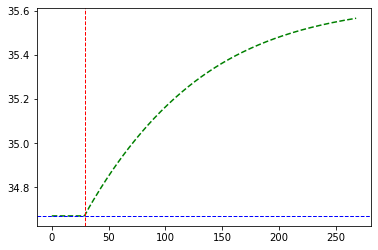

In [39]:
# UCTMT : CV 온도

plt.plot(db['UCTMT'], color='g', linestyle='--') # -> 2차측 방사선 경보 미발생
vline = plt.axvline(29, color='r', linestyle='--', linewidth=1)
hline = plt.axhline(34.67036, color='b', linestyle='--', linewidth=1)
34.67036

In [ ]:
CV_Temp = []
num = 3 # 증감을 판단하는 부분이 아니라면 필요없는 부분임.
for i in range(len(db)):
    if i > 29:
        sym_ch[num].append(db['UCTMT'][i])
        if len(sym_ch[num]) == 5  :
            if sym_ch[num][0] < sym_ch[num][1] < sym_ch[num][2] < sym_ch[num][3] < sym_ch[num][4] :
                if db['UCTMT'][i] > 34.67036:
                    CV_Temp.append(i+1)
print(f' CV SUMP 수위 증가 증상 만족 시간 : {CV_Temp[0]}초')

1

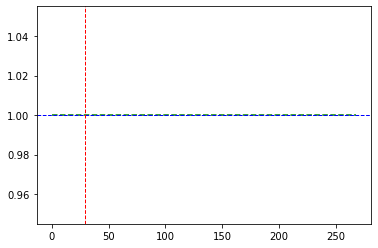

In [41]:
# HUCTMT : CV 습도 

plt.plot(db['HUCTMT'], color='g', linestyle='--') # -> 2차측 방사선 경보 미발생0
hline = plt.axhline(1, color='b', linestyle='--', linewidth=1)
vline = plt.axvline(29, color='r', linestyle='--', linewidth=1)

1

In [45]:
CV_Humid = []
num = 3 # 증감을 판단하는 부분이 아니라면 필요없는 부분임.
for i in range(len(db)):
    if i > 29:
        sym_ch[num].append(db['HUCTMT'][i])
        if len(sym_ch[num]) == 5  :
            if sym_ch[num][0] < sym_ch[num][1] < sym_ch[num][2] < sym_ch[num][3] < sym_ch[num][4] :
                if db['HUCTMT'][i] > 1:
                    CV_Humid.append(i+1)
if len(CV_Humid) == 0:
    print('증상을 만족하지 못했습니다.')
    
else:
    print(f' CV SUMP 수위 증가 증상 만족 시간 : {CV_Humid[0]}초')

증상을 만족하지 못했습니다.


24666.17188

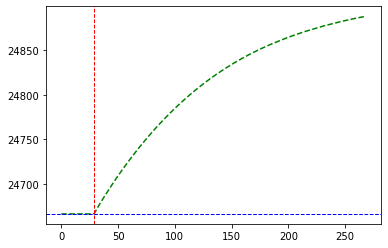

In [40]:
# PCTMT : CV 압력

plt.plot(db['PCTMT'], color='g', linestyle='--') # -> 2차측 방사선 경보 미발생
hline = plt.axhline(24666.17188, color='b', linestyle='--', linewidth=1)
vline = plt.axvline(29, color='r', linestyle='--', linewidth=1)

24666.17188

In [42]:
CV_Pre = []
num = 3 # 증감을 판단하는 부분이 아니라면 필요없는 부분임.
for i in range(len(db)):
    if i > 29:
        sym_ch[num].append(db['PCTMT'][i])
        if len(sym_ch[num]) == 5  :
            if sym_ch[num][0] < sym_ch[num][1] < sym_ch[num][2] < sym_ch[num][3] < sym_ch[num][4] :
                if db['PCTMT'][i] > 24666.17188:
                    CV_Pre.append(i+1)
print(f' CV SUMP 수위 증가 증상 만족 시간 : {CV_Pre[0]}초')

 CV SUMP 수위 증가 증상 만족 시간 : 31초


### 2.5  <font color=blue>CV Sump 수위 증가 및 배수조 펌프의 기동횟수 증가  - <font color=green>만족

<font color=red>REPORT


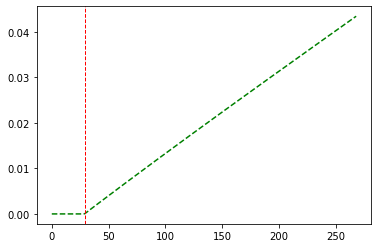

In [31]:
# DSECON : 2차측 방사선, 3.9E-3 : 2차측 방사선 경보 설정치
#plt.plot(db['ZINST22'], color='k') # -> 2차측 방사선 증가 확인
plt.plot(db['ZSUMP'], color='g', linestyle='--') # -> 2차측 방사선 경보 미발생
vline = plt.axvline(29, color='r', linestyle='--', linewidth=1)


0.00001


In [38]:
CV_SUMP = []
num = 3 # 증감을 판단하는 부분이 아니라면 필요없는 부분임.
for i in range(len(db)):
    if i > 29:
        sym_ch[num].append(db['ZSUMP'][i])
        if len(sym_ch[num]) == 5  :
            if sym_ch[num][0] < sym_ch[num][1] < sym_ch[num][2] < sym_ch[num][3] < sym_ch[num][4] :
                if db['ZSUMP'][i] > 0.0001:
                    CV_SUMP.append(i+1)
print(f' CV SUMP 수위 증가 증상 만족 시간 : {CV_SUMP[0]}초')

 CV SUMP 수위 증가 증상 만족 시간 : 35초


## 3.0  <font color=blue> 자동 동작사항

### 3.1  <font color=blue>가압기 수위가 17％ 이하로 감소할 경우 유출수 밸브가(BG-HV001/002/003, BG-LV459/460 ) 자동으로 차단된다.  - <font color=red>불만족

<font color=red>Report

<font color=red>절차서에 명시된 모든 유출수 밸브가 차단되었을 경우, 증상 만족으로 봄. (전체 4개 밸브)

<font color=red>또한, 가압기 수위 17% 이하도 규칙에 포함됨.

<font color=red>해당되는 17%가 설정치로 판단되나, 추후 어떤 설정치인지 파악할 필요 있음. (아마 Low setpoint or trip setpoint로 추정됨)

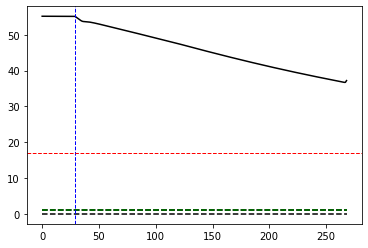

In [18]:
# ZINST63 : 가압기 수위, BHV1 : HV1 (45), BHV2 : HV2 (60), BHV3 : HV3 (75)
# BLV459 : 유출수 격리밸브
plt.plot(db['ZINST63'], color='k') # 가압기 수위 감소
plt.plot(db['BHV1'], color='k', linestyle='--')
plt.plot(db['BHV2'], color='k', linestyle='--')
plt.plot(db['BHV3'], color='k', linestyle='--')
plt.plot(db['BLV459'], color='g', linestyle='--')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)
hline = plt.axhline(17, color='r', linestyle='--', linewidth=1) # 가압기 수위 17% 표현

In [20]:
auto1 = []
for i in range(len(db)):
    if i > 29:
        if (db['ZINST63'][i] < 17) and (db['BHV1'][i] == 0) and (db['BHV2'][i] == 0) and (db['BHV3'][i] == 0) and (db['BLV459'][i] == 0):
            auto1.append(i+1)
if len(auto1) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 유출수밸브 차단 증상 만족 시간 : {auto1[0]}초')

증상을 만족하지 못했습니다.


### 3.2  <font color=blue>격납용기 환기차단 계측설비 관련 방사선감시기(GT-RE001/ 002/119/220)의 고방사선경보가 발생되면 격납용기 환기차단신호(CPIS) 및 주제어실 비상환기신호(CREVS)가 발생된다.  - <font color=red>불만족

<font color=red>report

<font color=red>증기발생기 취출수계통 (Blowdown System) 중 취출수 차단밸브는 미구현 상태임.

<font color=red>하지만, 취출수 유량 변수가 존재함에 따라 (취출수 유량 = 0)일 경우 취출수 차단 밸브가 닫힌다고 가정.

<font color=red>또한, 고방사선경보 발생이 전제조건이기 때문에, AND Gate로 묶어서 규칙을 구성함.

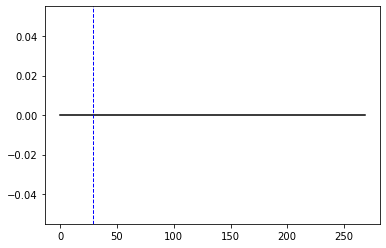

In [21]:
# ZINST116 : 취출수 유량
# DSECON : 2차측 방사선, 3.9E-3 : 2차측 방사선 경보 설정치
plt.plot(db['ZINST116'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [22]:
auto2 = []
for i in range(len(db)):
    if i > 29:
        if (db['DSECON'][i] > 3.9E-3) and (db['ZINST116']==0):
            auto2.append(i+1)
if len(auto2) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 취출수 차단밸브 닫힘 증상 만족 시간 : {auto2[0]}초')

증상을 만족하지 못했습니다.


### 3.3  <font color=blue>RCS 압력이 136.78㎏/㎠ 이하가 되면 원자로 트립(Rx Trip)이 발생한다. - <font color=green>만족

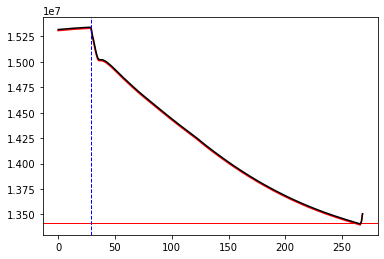

In [46]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(136.8*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [47]:
PRZ_low_trip = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 136.8*98067 and db['KRXTRIP'][i] == 1 :
            PRZ_low_trip.append(i+1)
if len(PRZ_low_trip) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f' Rx trip 만족 시간 : {PRZ_low_trip[0]}초')

 Rx trip 만족 시간 : 267초


### 3.4  <font color=blue>RCS 압력이 126.57㎏/㎠ 이하가 되면 안전주입(SI)이 발생한다.  - <font color=red>불만족

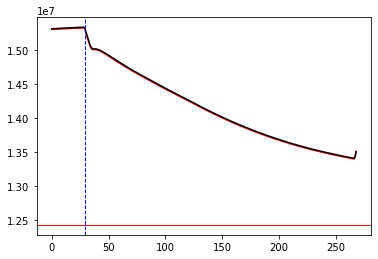

In [48]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(126.7*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [49]:
PRZ_low_SI = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 126.7*98067 and db['KSAFEI'][i] == 1 :
            PRZ_low_SI.append(i+1)
if len(PRZ_low_SI) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'SI 작동 만족 시간 : {PRZ_low_SI[0]}초')

증상을 만족하지 못했습니다.
